In [1]:
from datetime import datetime
import itertools
import json

import importlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn import metrics
import torch
from torch.utils.data import DataLoader

from database import data_utils, data_loader, shape_utils
from models import basic_ff
import run_models

importlib.reload(data_utils)
importlib.reload(basic_ff)
importlib.reload(data_loader)
importlib.reload(shape_utils)

RUN_FOLDER = "../results/throwaway/"

In [2]:
train_traces = data_utils.load_pkl(RUN_FOLDER + "kcm/" + "train_traces.pkl")
test_traces = data_utils.load_pkl(RUN_FOLDER + "kcm/" + "test_traces.pkl")
with open(RUN_FOLDER + "kcm/deeptte_formatted/" + "config.json") as f:
    config = json.load(f)
gtfs_data = data_utils.merge_gtfs_files("." + config['gtfs_folder'])
tte_train_chunks, tte_test = data_utils.load_train_test_data(RUN_FOLDER + "kcm/deeptte_formatted/", 5)

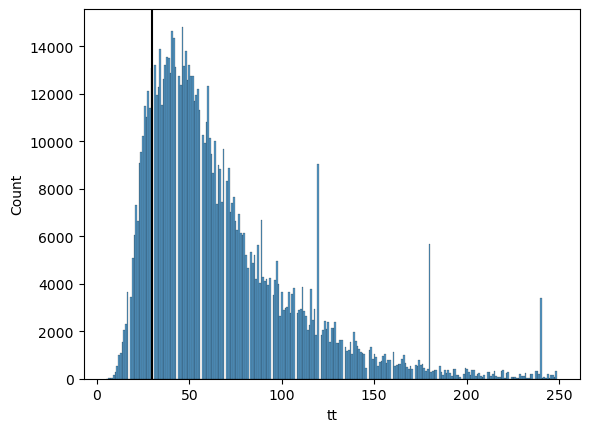

In [3]:
# Histogram of bus travel times in schedule
gtfs_data['arrival_s_prev'] = gtfs_data.groupby('trip_id').shift()[['arrival_s']]
gtfs_data_times = gtfs_data[['arrival_s','arrival_s_prev']].dropna()
gtfs_data_times['tt'] = gtfs_data_times['arrival_s'] - gtfs_data_times['arrival_s_prev']
# Time between bus stops
sns.histplot(gtfs_data_times.loc[gtfs_data_times['tt']<250, 'tt'])
plt.axvline(30, 0.0, 20000, color="black")

<AxesSubplot: xlabel='dist_calc_m', ylabel='Count'>

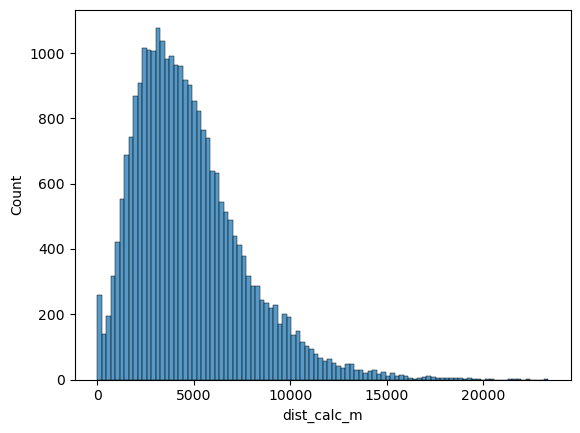

In [4]:
# Shingle distance
sns.histplot(train_traces.groupby('shingle_id').sum(numeric_only=True)['dist_calc_m'])

<AxesSubplot: xlabel='time_cumulative_s', ylabel='Count'>

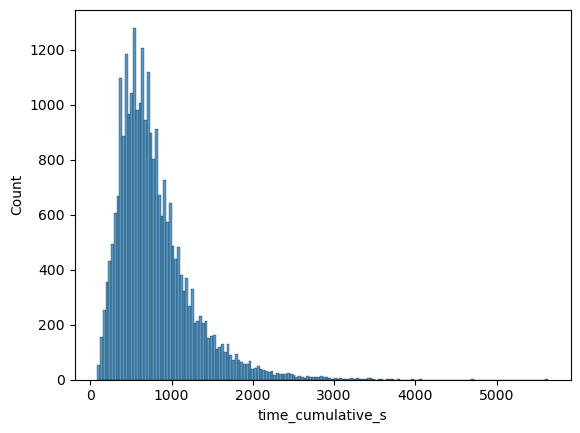

In [5]:
# Shingle travel time
sns.histplot(train_traces.groupby('shingle_id').last()['time_cumulative_s'])

<AxesSubplot: xlabel='lat', ylabel='Count'>

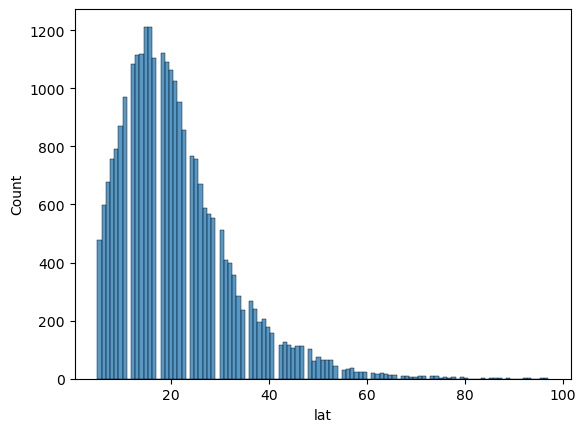

In [6]:
# Points per trajectory
sns.histplot(train_traces.groupby(['shingle_id']).count()['lat'])